#         TASK-1    DATA PREPARATION AND CUSTOMER ANALYTICS 



In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("QVI_transaction_data.xlsx") 

In [3]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


# SUMMARIZATION

In [4]:
data.describe()#using the describe function to summarize the data 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [32]:
data.isnull().sum()#checking for null values

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

/tmp/ipykernel_4462/2681103758.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.TOT_SALES,kde=True)


<Axes: xlabel='TOT_SALES', ylabel='Density'>

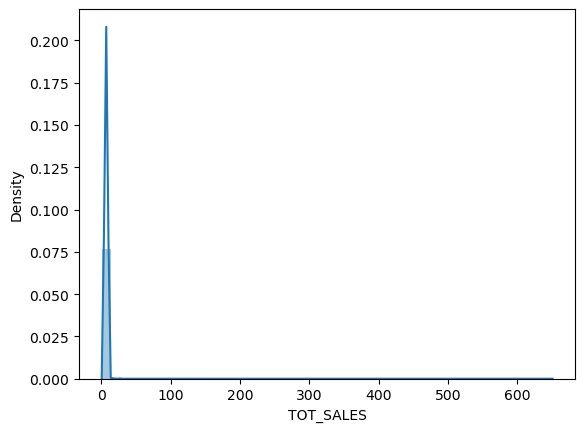

In [9]:
#to check whether any outliers are present in the TOT_SALES 
sns.distplot(data.TOT_SALES,kde=True)

In [10]:
#to remove outliers we are converting the dataset into numeric dataset
numeric_data=data.select_dtypes(['float','int'])

In [12]:
numeric_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,2,6.0
1,43599,1,1307,348,66,3,6.3
2,43605,1,1343,383,61,2,2.9
3,43329,2,2373,974,69,5,15.0
4,43330,2,2426,1038,108,3,13.8


# REMOVING OUTLIERS

In [22]:

x=numeric_data[numeric_data['TOT_SALES']<8.000] # mean for TOT sales is 7.3 we can take upto 10 as a limit

/tmp/ipykernel_4462/2076764446.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.TOT_SALES,kde=True)


<Axes: xlabel='TOT_SALES', ylabel='Density'>

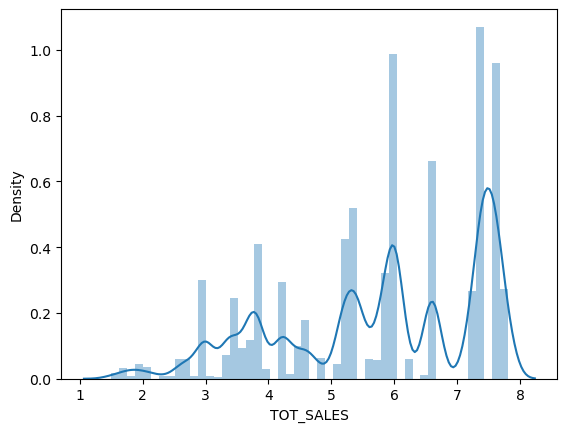

In [23]:
sns.distplot(x.TOT_SALES,kde=True)

# CHECKING DATA FORMATS

In [21]:
data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [53]:
from datetime import date, timedelta

# Assuming 'data' is your DataFrame and 'DATE' is the column containing Excel serial dates
start = date(1899, 12, 30)
new_date_format = []

for excel_date in data['DATE']:
    delta = timedelta(days=excel_date)
    new_date_format.append(start + delta)


In [55]:
data["DATE"] = pd.to_datetime(pd.Series(new_date_format))
print(data["DATE"].dtype)

datetime64[ns]


In [56]:
data["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai  C

In [57]:
import pandas as pd
from collections import Counter

# Assuming transaction is your DataFrame
freq = Counter(word for name in data["PROD_NAME"] for word in name.split())

# Create a DataFrame from the Counter
fre = pd.DataFrame(freq.items(), columns=['Word', 'Frequency'])

# Filter out digits and ampersands
fre = fre[~fre['Word'].str[0].str.isdigit() & (fre['Word'] != '&')]

# Sort by frequency in descending order
fre = fre.sort_values(by='Frequency', ascending=False)

# Display the most frequent words
print(fre.head())


      Word  Frequency
11   Chips      49770
16  Kettle      41288
21    Salt      27976
6   Cheese      27890
8   Smiths      27390


In [58]:
data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,229825,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 00:29:27.285543680,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            229825 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [59]:
data[data['PROD_QTY']>5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [15]:
data.drop(labels=data[data['PROD_QTY']==200].index,inplace=True)
#transaction.drop(labels=transaction[transaction['TOT_SALES']>600].index,inplace=True)
#transaction.drop(labels=transaction[transaction['TXN_ID']>1500000].index,inplace=True)

#missing dates

ts=data.groupby('DATE').count()
ts.head()



,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
43282,724,724,724,724,724,724,724
43283,711,711,711,711,711,711,711
43284,722,722,722,722,722,722,722
43285,714,714,714,714,714,714,714
43286,712,712,712,712,712,712,712


In [16]:
ts.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,727.565934,727.565934,727.565934,727.565934,727.565934,727.565934,727.565934
std,35.255049,35.255049,35.255049,35.255049,35.255049,35.255049,35.255049
min,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
25%,706.750000,706.750000,706.750000,706.750000,706.750000,706.750000,706.750000
50%,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
75%,744.250000,744.250000,744.250000,744.250000,744.250000,744.250000,744.250000
max,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000


In [45]:
# Create a sequence of dates and join this the count of transactions by date
# Create a column of dates that includes every day from 1 Jul 2018 to30 Jun 2019
dates_seq = pd.date_range("2018-07-01","2019-06-30")

# Join it onto the data to fill in the missing day.
fill_dates = ts.reindex(dates_seq)
fill_dates


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# It seems like 2018-12-25 is the missing day
fill_dates.loc['2018-12-25',:]


STORE_NBR        NaN
LYLTY_CARD_NBR   NaN
TXN_ID           NaN
PROD_NBR         NaN
PROD_NAME        NaN
PROD_QTY         NaN
TOT_SALES        NaN
Name: 2018-12-25 00:00:00, dtype: float64

Text(0, 0.5, 'Transaction')

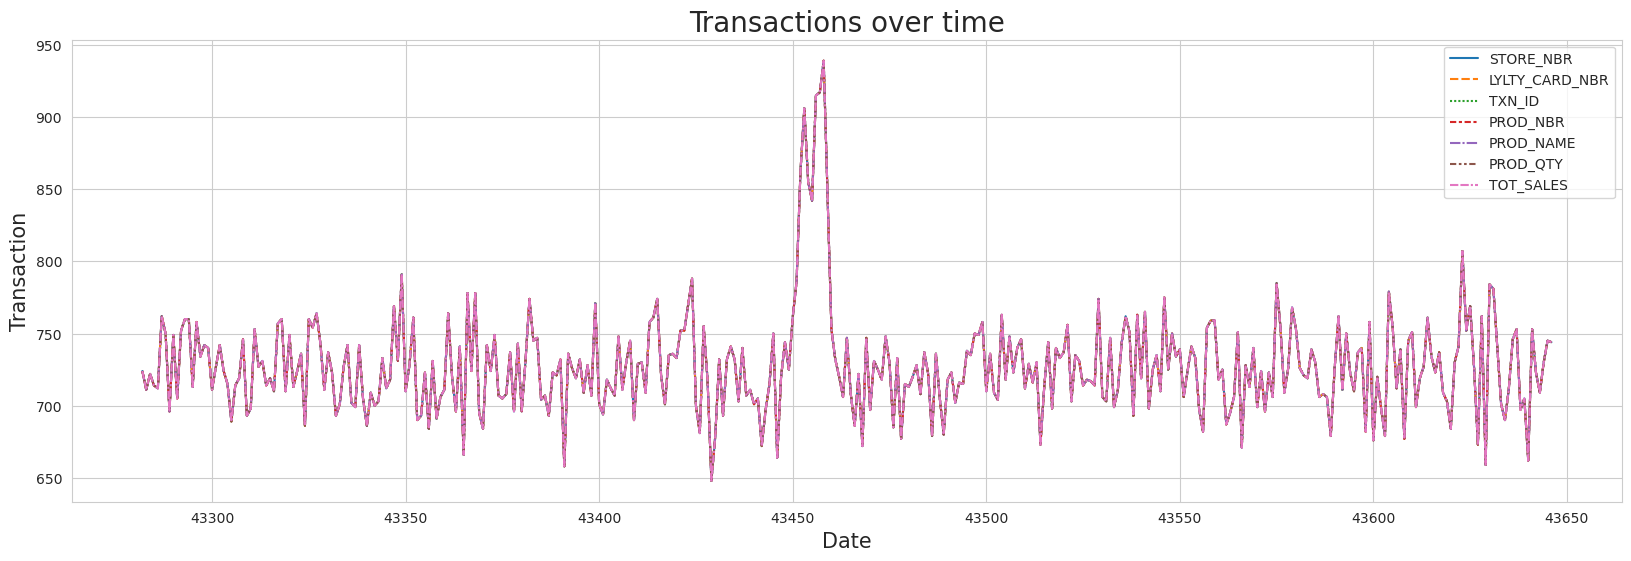

In [51]:
# Plot transactions over time
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
plt.title("Transactions over time",fontsize=20)
sns.lineplot(data=ts)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Transaction",fontsize=15)

In [52]:
# Start with pack size
# Taking the digits that are in PROD_NAME
data["PACK_SIZE"] = data["PROD_NAME"].str.extract("([0-9]+)").astype("float")
data["PACK_SIZE"].head()


0    175.0
1    175.0
2    170.0
3    175.0
4    150.0
Name: PACK_SIZE, dtype: float64

In [54]:
# Descriptive statistics of PACK_SIZE
data["PACK_SIZE"].describe()


count    264834.000000
mean        182.425512
std          64.325148
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64

Text(0, 0.5, 'Number of Transactions')

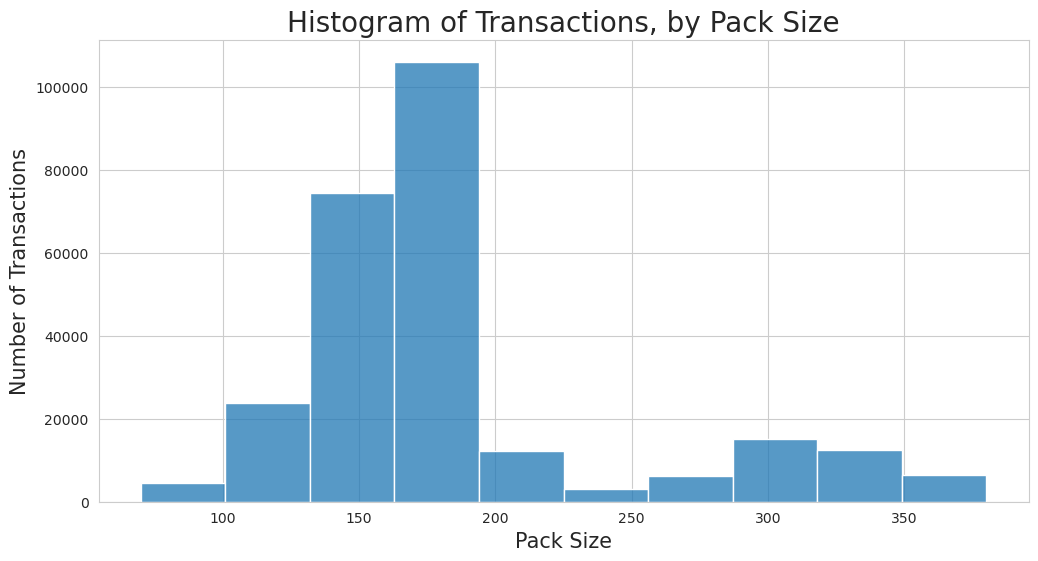

In [55]:
# Plot a histogram showing the number of transactions by pack size
plt.figure(figsize=(12,6))
sns.histplot(x=data["PACK_SIZE"], bins=10, kde=False)
plt.title("Histogram of Transactions, by Pack Size",fontsize=20)
plt.xlabel("Pack Size",fontsize=15)
plt.ylabel("Number of Transactions",fontsize=15)


In [58]:
# Now to create brands, we can use the first word in PROD_NAME 
data["BRAND"] = data["PROD_NAME"].str.split().str[0]
data["BRAND"].head()



0    Natural
1        CCs
2     Smiths
3     Smiths
4     Kettle
Name: BRAND, dtype: object

In [60]:
# Check brands which are not sure
data["PROD_NAME"].loc[data["BRAND"]=="Grain"].head()

7      Grain Waves         Sweet Chilli 210g
9      Grain Waves Sour    Cream&Chives 210G
85     Grain Waves         Sweet Chilli 210g
181    Grain Waves         Sweet Chilli 210g
225    Grain Waves         Sweet Chilli 210g
Name: PROD_NAME, dtype: object

In [61]:
# Clean brand names
def rename_brand(new,old):
     data["BRAND"].loc[data["BRAND"]==old] = new

rename_brand("Doritos","Dorito")
rename_brand("Grain Waves","Grain")
rename_brand("Grain Waves","GrnWves")
rename_brand("Infuzions","Infzns")
rename_brand("Natural Chip Co","NCC")
rename_brand("Natural Chip Co","Natural")
rename_brand("Red Rock Deli","Red")
rename_brand("Red Rock Deli","RRD")
rename_brand("Smiths","Smith")
rename_brand("Sunbites","Snbts")
rename_brand("Woolworths","WW")

# Check results
nbd = data["BRAND"].unique()
nbd.sort()
nbd

/tmp/ipykernel_27354/2970261787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["BRAND"].loc[data["BRAND"]==old] = new
/tmp/ipykernel_27354/2970261787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["BRAND"].loc[data["BRAND"]==old] = new
/tmp/ipykernel_27354/2970261787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["BRAND"].loc[data["BRAND"]==old] = new
/tmp/ipykernel_27354/2970261787.py:3: SettingWithCopyWa

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos',
       'French', 'Grain Waves', 'Infuzions', 'Kettle', 'Natural Chip Co',
       'Old', 'Pringles', 'Red Rock Deli', 'Smiths', 'Sunbites', 'Thins',
       'Tostitos', 'Twisties', 'Tyrrells', 'Woolworths'], dtype=object)

Text(0.5, 0, 'Transaction')

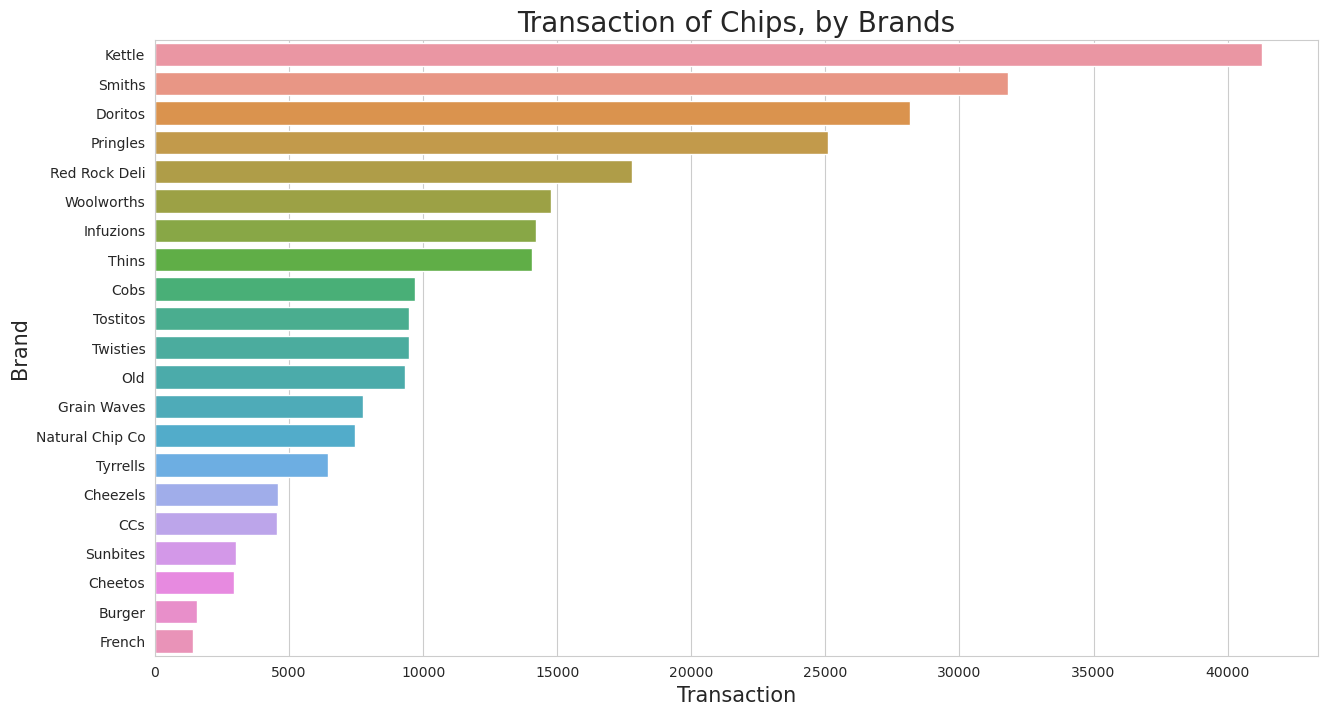

In [62]:
# Plot a barchart to show the total sales of each brand
plt.figure(figsize=(15,8))
sns.barplot(x = data["BRAND"].value_counts(),y=data["BRAND"].value_counts().index)
plt.title("Transaction of Chips, by Brands",fontsize=20)
plt.ylabel("Brand",fontsize=15)
plt.xlabel("Transaction",fontsize=15)



In [63]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle


In [65]:
customer_data=pd.read_csv("QVI_purchase_behaviour.csv")

In [66]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [68]:
customer_data.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [69]:
merge_data = pd.merge(data,customer_data,on="LYLTY_CARD_NBR")
merge_data.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160.0,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [70]:
merge_data.count()

DATE                264834
STORE_NBR           264834
LYLTY_CARD_NBR      264834
TXN_ID              264834
PROD_NBR            264834
PROD_NAME           264834
PROD_QTY            264834
TOT_SALES           264834
PACK_SIZE           264834
BRAND               264834
LIFESTAGE           264834
PREMIUM_CUSTOMER    264834
dtype: int64

In [71]:
merge_data.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [72]:
# save as csv
merge_data.to_csv("merge_data.csv")

In [73]:
#  Calculate the total sales by those dimensions
totsales_l_p = pd.DataFrame(merge_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["TOT_SALES"].sum())
totsales_l_p


TOT_SALES
LIFESTAGE              PREMIUM_CUSTOMER           
MIDAGE SINGLES/COUPLES Budget             35514.80
                       Mainstream         90803.85
                       Premium            58432.65
NEW FAMILIES           Budget             21928.45
                       Mainstream         17013.90
                       Premium            11491.10
OLDER FAMILIES         Budget            168363.25
                       Mainstream        103445.55
                       Premium            80658.40
OLDER SINGLES/COUPLES  Budget            136769.80
                       Mainstream        133393.80
                       Premium           132263.15
RETIREES               Budget            113147.80
                       Mainstream        155677.05
                       Premium            97646.05
YOUNG FAMILIES         Budget            139345.85
                       Mainstream         92788.75
                       Premium            84025.50
YOUNG SINGLES/COUPLES  Budget             61141.60
                       Mainstream        157621.60
                       Premium            41642.10

In [75]:
#  Calculate the customer count in each segment
count_l_p = pd.DataFrame(customer_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).count())
count_l_p.columns=["CUSTOMER_COUNTS"]
count_l_p


CUSTOMER_COUNTS
LIFESTAGE              PREMIUM_CUSTOMER                 
MIDAGE SINGLES/COUPLES Budget                       1504
                       Mainstream                   3340
                       Premium                      2431
NEW FAMILIES           Budget                       1112
                       Mainstream                    849
                       Premium                       588
OLDER FAMILIES         Budget                       4675
                       Mainstream                   2831
                       Premium                      2274
OLDER SINGLES/COUPLES  Budget                       4929
                       Mainstream                   4930
                       Premium                      4750
RETIREES               Budget                       4454
                       Mainstream                   6479
                       Premium                      3872
YOUNG FAMILIES         Budget                       4017
                       Mainstream                   2728
                       Premium                      2433
YOUNG SINGLES/COUPLES  Budget                       3779
                       Mainstream                   8088
                       Premium                      2574

In [76]:
# Calculate the average number of units per customer by those two dimensions
merge_l_p = pd.merge(totsales_l_p,count_l_p,on=["LIFESTAGE","PREMIUM_CUSTOMER"])
merge_l_p['SALES_QTY'] = merge_data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["PROD_QTY"].sum()
merge_l_p['AVG_SALES_QTY'] = (merge_l_p["SALES_QTY"]/merge_l_p["CUSTOMER_COUNTS"])
merge_l_p


TOT_SALES  CUSTOMER_COUNTS  \
LIFESTAGE              PREMIUM_CUSTOMER                               
MIDAGE SINGLES/COUPLES Budget             35514.80             1504   
                       Mainstream         90803.85             3340   
                       Premium            58432.65             2431   
NEW FAMILIES           Budget             21928.45             1112   
                       Mainstream         17013.90              849   
                       Premium            11491.10              588   
OLDER FAMILIES         Budget            168363.25             4675   
                       Mainstream        103445.55             2831   
                       Premium            80658.40             2274   
OLDER SINGLES/COUPLES  Budget            136769.80             4929   
                       Mainstream        133393.80             4930   
                       Premium           132263.15             4750   
RETIREES               Budget            113147.80             4454   
                       Mainstream        155677.05             6479   
                       Premium            97646.05             3872   
YOUNG FAMILIES         Budget            139345.85             4017   
                       Mainstream         92788.75             2728   
                       Premium            84025.50             2433   
YOUNG SINGLES/COUPLES  Budget             61141.60             3779   
                       Mainstream        157621.60             8088   
                       Premium            41642.10             2574   

                                         SALES_QTY  AVG_SALES_QTY  
LIFESTAGE              PREMIUM_CUSTOMER                            
MIDAGE SINGLES/COUPLES Budget                 9496       6.313830  
                       Mainstream            22699       6.796108  
                       Premium               15526       6.386672  
NEW FAMILIES           Budget                 5571       5.009892  
                       Mainstream             4319       5.087161  
                       Premium                2957       5.028912  
OLDER FAMILIES         Budget                45065       9.639572  
                       Mainstream            27756       9.804309  
                       Premium               21771       9.573879  
OLDER SINGLES/COUPLES  Budget                35220       7.145466  
                       Mainstream            34997       7.098783  
                       Premium               33986       7.154947  
RETIREES               Budget                28764       6.458015  
                       Mainstream            40518       6.253743  
                       Premium               24884       6.426653  
YOUNG FAMILIES         Budget                37111       9.238486  
                       Mainstream            25044       9.180352  
                       Premium               22406       9.209207  
YOUNG SINGLES/COUPLES  Budget                16671       4.411485  
                       Mainstream            38632       4.776459  
                       Premium               11331       4.402098

In [77]:
# Calculate the average price per unit sold (average sale price) by those two customer dimensions
merge_l_p['AVG_SALES_PRICE'] = (merge_l_p["TOT_SALES"]/merge_l_p["SALES_QTY"])
merge_l_p


TOT_SALES  CUSTOMER_COUNTS  \
LIFESTAGE              PREMIUM_CUSTOMER                               
MIDAGE SINGLES/COUPLES Budget             35514.80             1504   
                       Mainstream         90803.85             3340   
                       Premium            58432.65             2431   
NEW FAMILIES           Budget             21928.45             1112   
                       Mainstream         17013.90              849   
                       Premium            11491.10              588   
OLDER FAMILIES         Budget            168363.25             4675   
                       Mainstream        103445.55             2831   
                       Premium            80658.40             2274   
OLDER SINGLES/COUPLES  Budget            136769.80             4929   
                       Mainstream        133393.80             4930   
                       Premium           132263.15             4750   
RETIREES               Budget            113147.80             4454   
                       Mainstream        155677.05             6479   
                       Premium            97646.05             3872   
YOUNG FAMILIES         Budget            139345.85             4017   
                       Mainstream         92788.75             2728   
                       Premium            84025.50             2433   
YOUNG SINGLES/COUPLES  Budget             61141.60             3779   
                       Mainstream        157621.60             8088   
                       Premium            41642.10             2574   

                                         SALES_QTY  AVG_SALES_QTY  \
LIFESTAGE              PREMIUM_CUSTOMER                             
MIDAGE SINGLES/COUPLES Budget                 9496       6.313830   
                       Mainstream            22699       6.796108   
                       Premium               15526       6.386672   
NEW FAMILIES           Budget                 5571       5.009892   
                       Mainstream             4319       5.087161   
                       Premium                2957       5.028912   
OLDER FAMILIES         Budget                45065       9.639572   
                       Mainstream            27756       9.804309   
                       Premium               21771       9.573879   
OLDER SINGLES/COUPLES  Budget                35220       7.145466   
                       Mainstream            34997       7.098783   
                       Premium               33986       7.154947   
RETIREES               Budget                28764       6.458015   
                       Mainstream            40518       6.253743   
                       Premium               24884       6.426653   
YOUNG FAMILIES         Budget                37111       9.238486   
                       Mainstream            25044       9.180352   
                       Premium               22406       9.209207   
YOUNG SINGLES/COUPLES  Budget                16671       4.411485   
                       Mainstream            38632       4.776459   
                       Premium               11331       4.402098   

                                         AVG_SALES_PRICE  
LIFESTAGE              PREMIUM_CUSTOMER                   
MIDAGE SINGLES/COUPLES Budget                   3.739975  
                       Mainstream               4.000346  
                       Premium                  3.763535  
NEW FAMILIES           Budget                   3.936178  
                       Mainstream               3.939315  
                       Premium                  3.886067  
OLDER FAMILIES         Budget                   3.736009  
                       Mainstream               3.726962  
                       Premium                  3.704855  
OLDER SINGLES/COUPLES  Budget                   3.883299  
                       Mainstream               3.811578  
                       Premium                  3.89